In [2]:
# Relevant Libraries
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import sklearn 

# Evaluating Data Set
I will load data set into a Pandas DataFrame for ease-of-use and necessary structure for many techniques. In addition, this data set has some blank entries that will distort any results I get. Unfortunately, I can't use an "average" for the missing data because it would materially disrupt the analysis

In [3]:
# Load Data into Data Frame
data = data = pd.DataFrame.from_csv(r"C:\Users\James\Documents\heart_attack.csv",index_col=None)
data.describe()
# Drop rows with blank spaces
data = data[~(data.astype(str) == ' ').any(axis=1)]
data = data.dropna()
data.iloc[0:2] = data.iloc[0:2].astype(int)
column_names = data.columns
data.describe()

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Attack
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,132.639847,248.823755,0.072797,0.226054,139.226054,0.318008,0.651341,0.375479
std,7.842244,0.441843,0.970718,17.709857,65.667985,0.260302,0.470935,23.757401,0.466597,0.979152,0.485177
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,242.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,280.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


# Distribution Analysis
In this next section, I will review the relative distribution for a variety of continuous & discrete variables. I'm expecting the continuous variables, e.g.(Age, Trestbps (Resting Heart Rate), Chol (Cholesterol)) to approximate normal distrbiutions, and many of the discrete variables should model well via Bernoulli

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\James\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


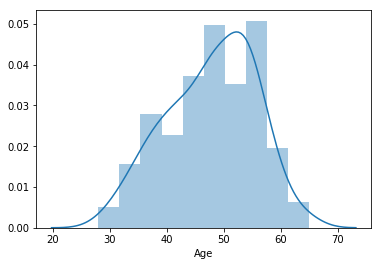

In [4]:
sns.distplot(data['Age'])
plt.show()

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\James\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


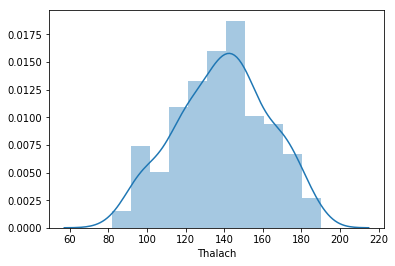

In [5]:
sns.distplot(data['Thalach'])
plt.show()

C:\Users\James\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


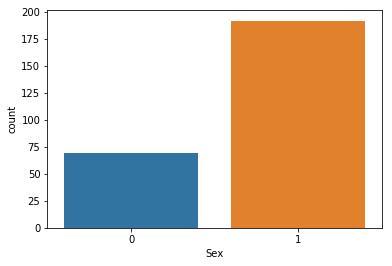

1    73.563218
0    26.436782
Name: Sex, dtype: float64

In [6]:
sns.countplot(data.Sex)
plt.show()
data['Sex'].value_counts(normalize=True)*100

C:\Users\James\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


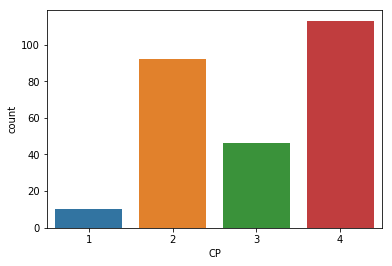

4    43.295019
2    35.249042
3    17.624521
1     3.831418
Name: CP, dtype: float64

In [7]:
sns.countplot(data.CP)
plt.show()
data['CP'].value_counts(normalize=True)*100

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\James\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


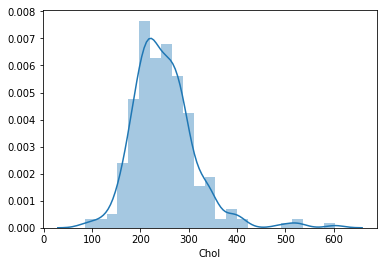

In [8]:
sns.distplot(data.Chol)
plt.show()

C:\Users\James\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


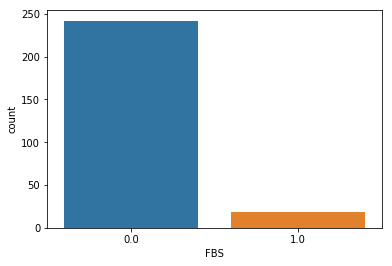

0.0    92.720307
1.0     7.279693
Name: FBS, dtype: float64

In [9]:
sns.countplot(data.FBS)
plt.show()
data['FBS'].value_counts(normalize=True)*100

C:\Users\James\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


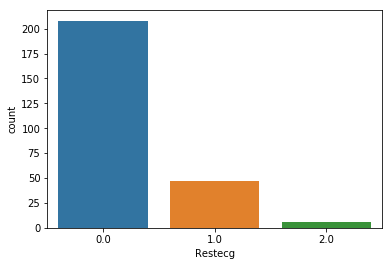

0.0    79.693487
1.0    18.007663
2.0     2.298851
Name: Restecg, dtype: float64

In [10]:
sns.countplot(data.Restecg)
plt.show()
data['Restecg'].value_counts(normalize=True)*100

C:\Users\James\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


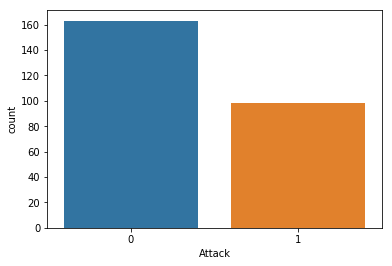

0    62.452107
1    37.547893
Name: Attack, dtype: float64

In [11]:
sns.countplot(data.Attack)
plt.show()
data['Attack'].value_counts(normalize=True)*100

Roughly 62% of the data set does not have heart attacks. This indicates there might be specific characteristics that serve as a tell 

# Principal Component Analysis
The purpose of principal component analysis is to determine which factors exert the most influence, and the direction of said influence. For the sake of simplicity, I will use only four, continous features and implement the technique.

In [12]:
#Principal Component Analysis

from sklearn.preprocessing import StandardScaler
features = ['Age', 'Chol', 'Thalach', 'Trestbps']

# Separating out the features
x = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Attack']].values


# Standardizing the features
x = StandardScaler().fit_transform(x)


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
finalDf = pd.concat([principalDf, data[['Attack']]], axis = 1)

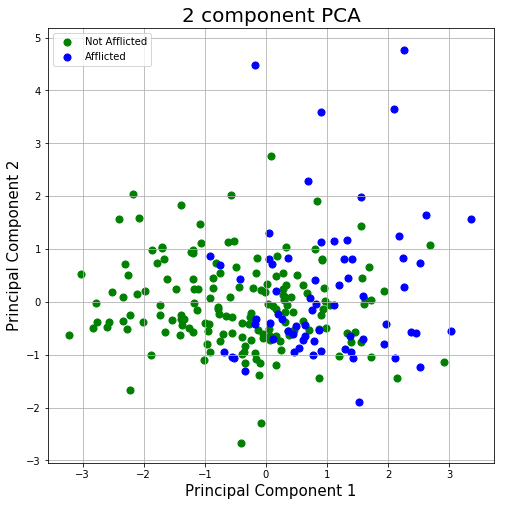

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
legend = ["Not Afflicted", "Afflicted"]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Attack'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(legend)
ax.grid()
plt.show()

In [16]:
pca.explained_variance_ratio_

array([0.42424506, 0.23722367])

# Bayesian Methods
The idea here will be to provide some educated assumptions about the "prior" distribution & where the true expected values lies, if we were to know the type of relationship. In this case, heart attack incidences are modeled by 'N' Bernoulli trials, alternatively known as a Binomial Distribution. I will be using PYMC3 Generalized Linear Models Module for simplicity, as it takes Patsy strings for input which is useful for creating a model as you would handwritten

<Figure size 1440x1440 with 0 Axes>

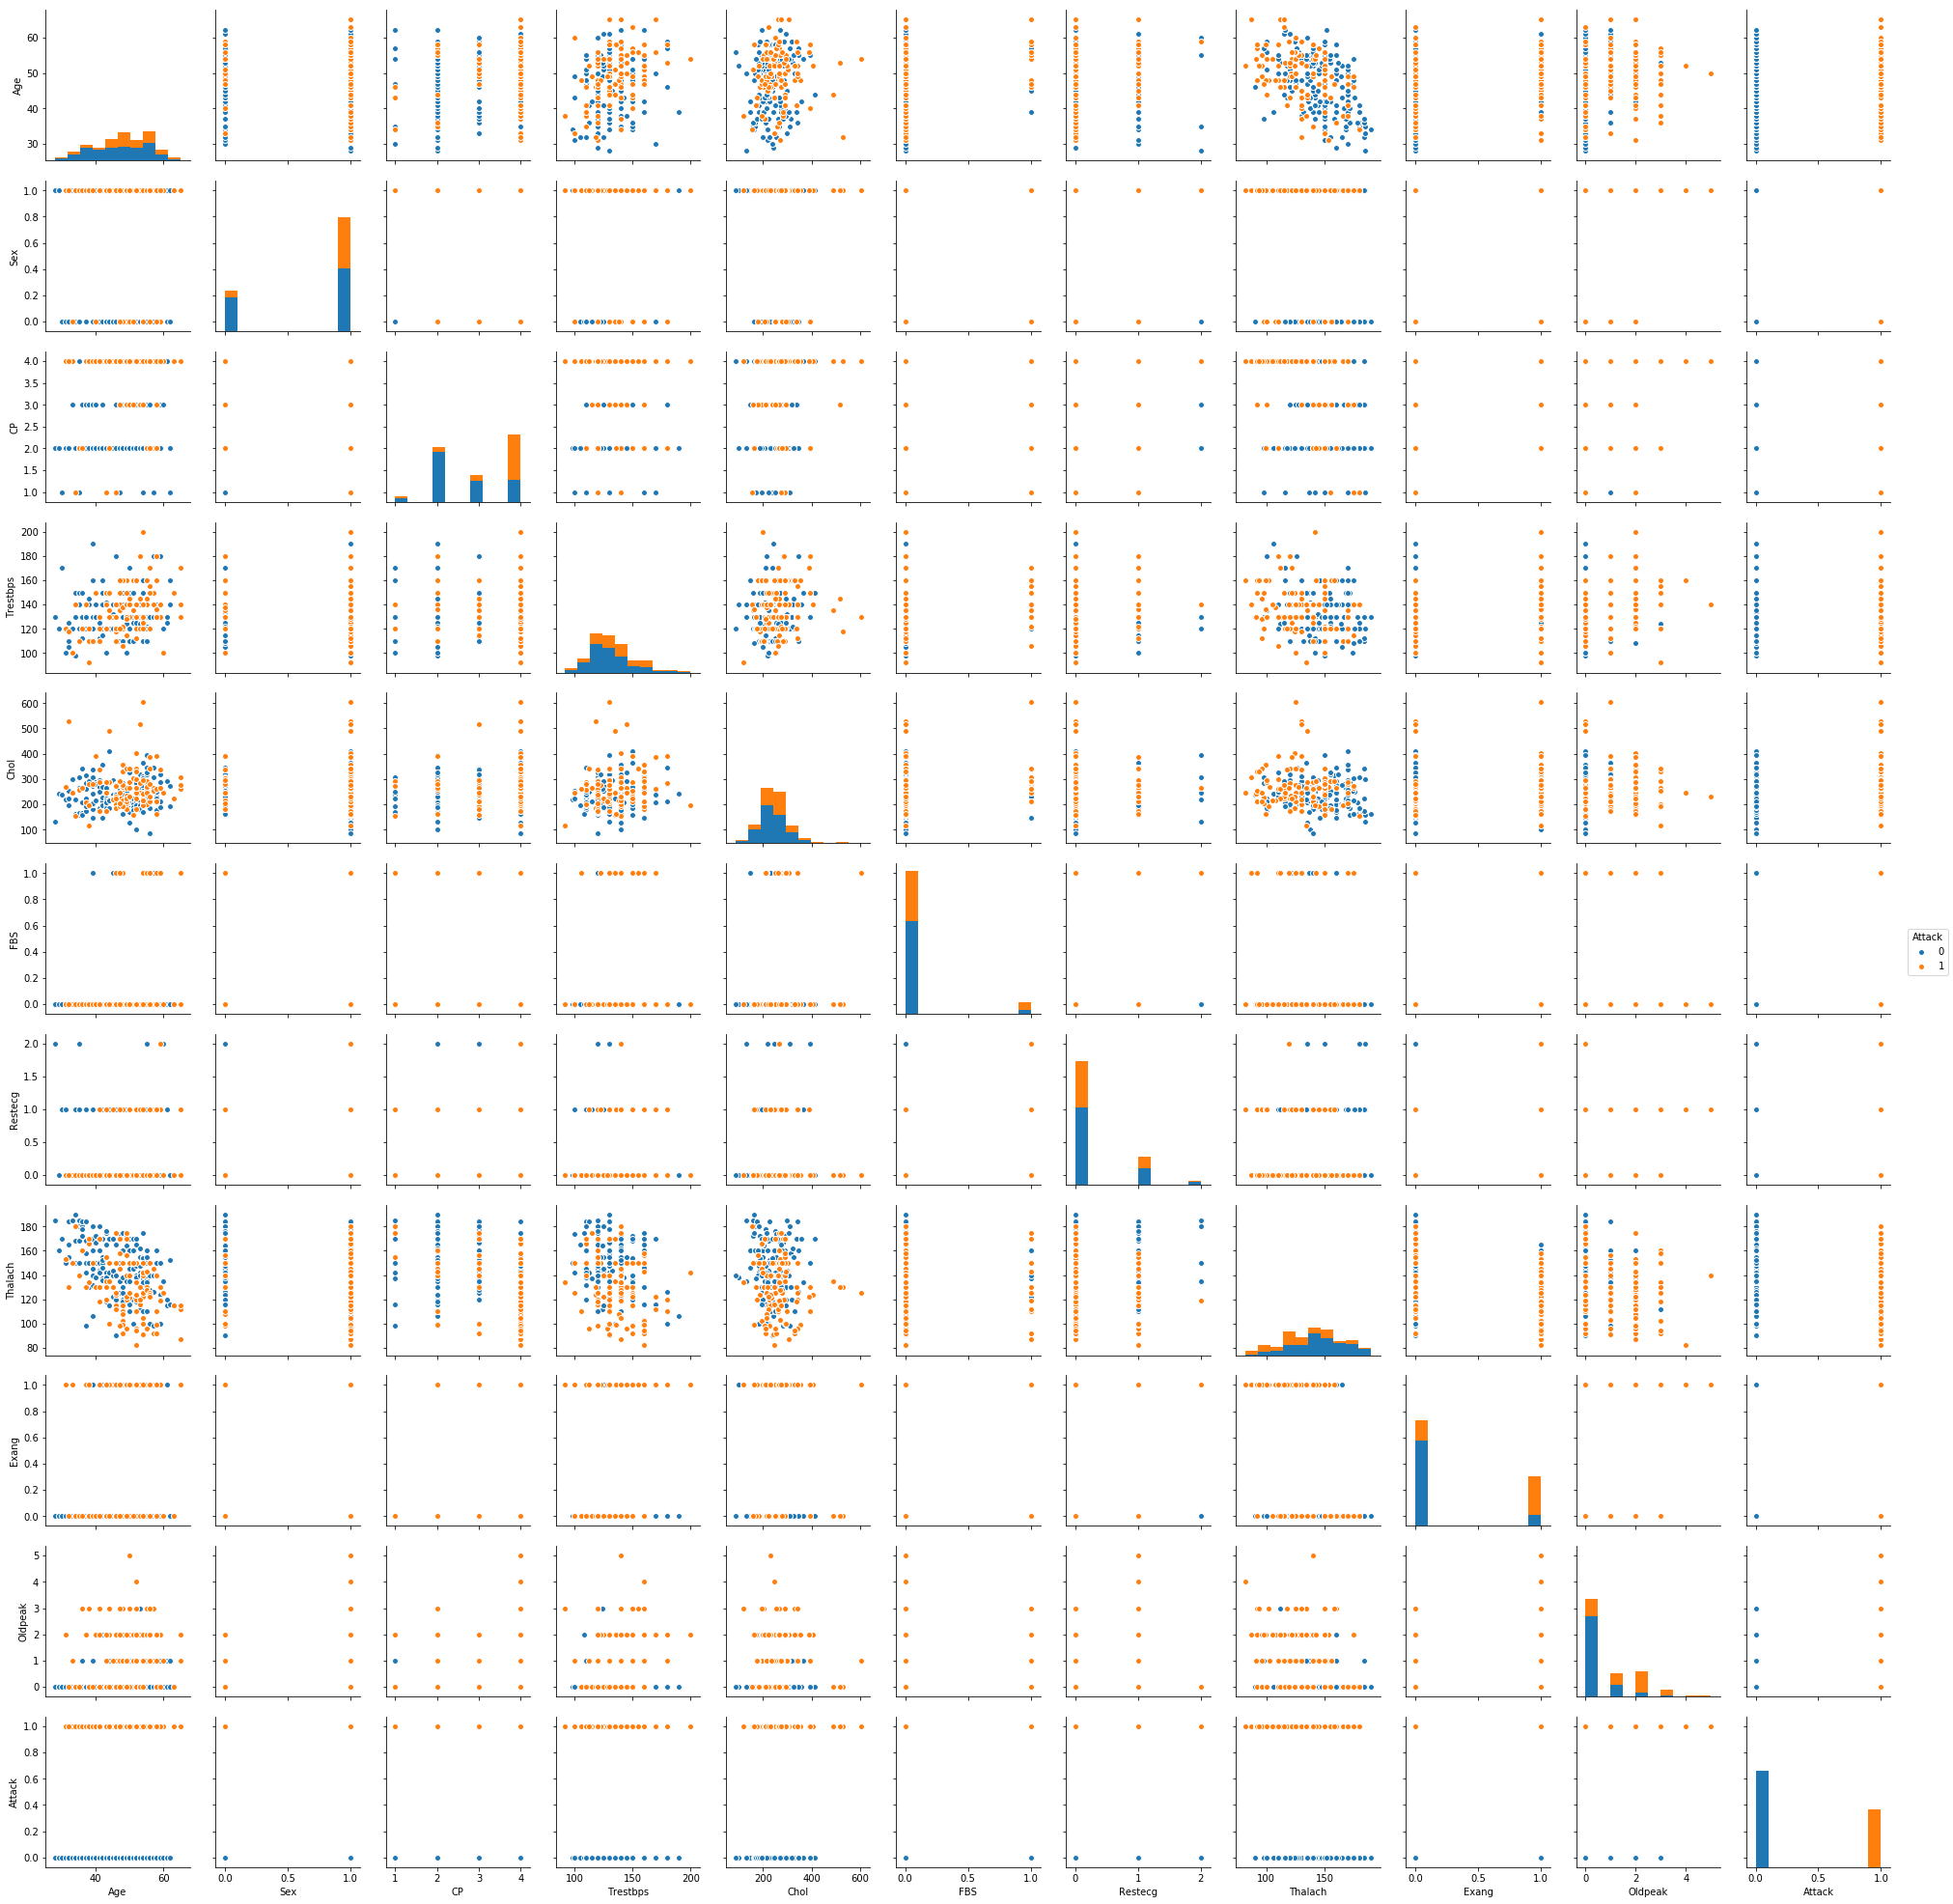

In [21]:
# Setup for Bayesian framework analysis
fig = plt.figure(figsize=(20,20))
graph = sns.pairplot(data,hue='Attack')
plt.show()

In [ ]:
# Covariance matrix
figure = plt.figure(figsize=(15,10))
sns.set(style="white")
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Setup Bayesian Framework for Bayesian estimation of parameters in a logistic model
niter = 1000

with pm.Model() as model:
    pm.glm.GLM.from_formula('Attack ~ Age + Chol', data, family=pm.glm.families.Binomial())
    trace = pm.sample(niter, step=pm.NUTS(), random_seed=123, progressbar=True)

While you don't have to specify the step parameter, I believe NUTS (No U-Turn Sampler), would do a better job than Metropolis-Hastings because it covers a wider distrbution of samples

In [ ]:
df_trace = pm.trace_to_dataframe(trace)
pd.plotting.scatter_matrix(df_trace[-1000:], diagonal='kde')
plt.show()


In [ ]:
pm.summary(trace)

One key factor in this specific setup is interpretability of results. The above table is definitely difficult to comprehend in the context of how the original Age and Cholesterol information was consumed. However, these outputs are effective in desigining prediction models because I have an acute understanding of where my error resides. We can see that the intercept has a much larger error & far wider Standard Deviation than both Age and Cholesterol. I think this is the key for why Bayesian Methods are useful - you can quantify your uncertainty

In [ ]:
sns.kdeplot(trace['Age'], trace['Chol'])
plt.xlabel('Age', fontsize=20)
plt.ylabel('Chol', fontsize=20)
plt.title("KDE Plot of Age & Cholesterol")
plt.style.use('ggplot')
plt.show()

In [ ]:
intercept, Age, Chol = df_trace[-niter//2:].mean(0)

def predict(a, c, Age=Age, Chol=Chol):
    """Predict incidence of heart attack given age (a) and cholesterol (c) values."""
    v = intercept + Age*a + Chol*c
    return np.exp(v)/(1+np.exp(v))

# calculate predictions on grid
xs = np.linspace(data.Age.min(), data.Age.max(), 100)
ys = np.linspace(data.Chol.min(), data.Chol.max(), 100)
X, Y = np.meshgrid(xs, ys)
Z = predict(X, Y)

plt.figure(figsize=(6,6))

# plot 0.5 contour line 
plt.contour(X, Y, Z, levels=[0.5])

# classify all subjects
colors = ['lime' if i else 'yellow' for i in data.Attack]
ps = predict(data.Age, data.Chol)
errs = ((ps < 0.5) & data.Attack) |((ps >= 0.5) & (1-data.Attack))
plt.scatter(data.Age[errs], data.Chol[errs], facecolors='red', s=150)
plt.scatter(data.Age, data.Chol, facecolors=colors, edgecolors='k', s=50, alpha=1);
plt.xlabel('Age', fontsize=16)
plt.ylabel('Cholesterol', fontsize=16)
plt.title('Heart Attack Classification by Age & Cholesterol', fontsize=16)
plt.tight_layout()
plt.show()

This particular model didn't do a great job of classifying, but the method here is far more readable than the prior table. Model parameters were generated from the MCMC methods earlier, and then used the mean of the trace for those samples. I plan to fine tune this technique to get better performance, but what is clear is that a linear classifier is not sufficient for data of this type using these factors. It would likely need to be projected on to a different plane (higher-order) to truly understand the effects